# Modeling complex time series

![Sample Image](/Users/maukanmir/Documents/Machine-Learning/AI-ML-Textbooks/AI-ML-Learning/images/ARMA-process.png)


## Examining the autoregressive moving average process
#### The autoregressive moving average process is a combination of the autoregressive process and the moving average process. It states that the present value is linearly dependent on its own previous values and a constant, just like in an autoregressive process, as well as on the mean of the series, the current error term, and past error terms, like in a moving average process

#### The autoregressive moving average process is denoted as ARMA(p,q), where p is the order of the autoregressive portion, and q is the order of the moving average portion. Mathematically, the ARMA(p,q) process is expressed as a linear combination of a constant C, the past values of the series yt–p, the mean of the series µ, past error terms ϵt–q, and the current error term ϵt, as shown in equation 6.1.

- yt = C + ϕ1yt–1 + ϕ2yt–2 +⋅⋅⋅+ ϕpyt–p + ϵt + θ1ϵt–1 + θ2ϵt–2 +⋅⋅⋅+ θqϵt–q

In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
 
np.random.seed(42)
 
ar1 = np.array([1, -0.33])
ma1 = np.array([1, 0.9])
 
ARMA_1_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000) 

In [2]:
from statsmodels.tsa.stattools import adfuller
 
ADF_result = adfuller(ARMA_1_1)
 
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -6.429878682042679
p-value: 1.7078466680097946e-08


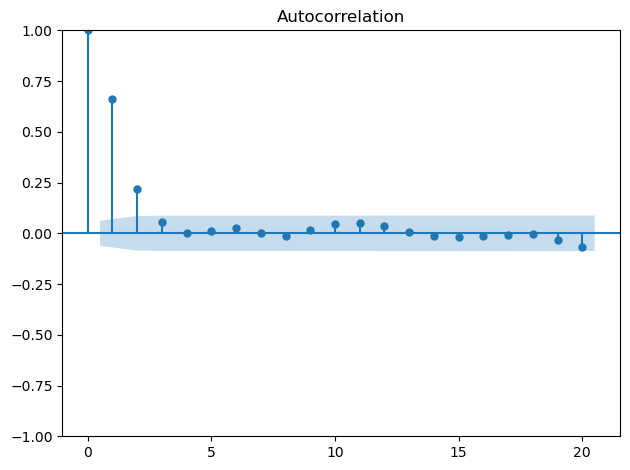

In [3]:
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ARMA_1_1, lags=20);
 
plt.tight_layout()

#### In figure 6.4 you’ll notice a sinusoidal pattern in the plot, which indicates the presence of an autoregressive process. This is expected, since we simulated an ARMA(1,1) process and we know of the existence of the autoregressive portion. Furthermore, you’ll notice that the last significant coefficient is at lag 2. However, we know that our simulated data has an MA(1) process, so we would expect to have significant coefficients up to lag 1 only. We can thus conclude that the ACF plot does not reveal any useful information about the order q of our ARMA(1,1) process.

#### We can now move on to the next step outlined in figure 6.3 and plot the PACF. In chapter 5 you learned that the PACF can be used to find the order of a stationary AR(p) process. We will now verify whether we can find the order p of our simulated ARMA(1,1) process, where p = 1. We’ll use the plot_pacf function to generate figure 6.5.

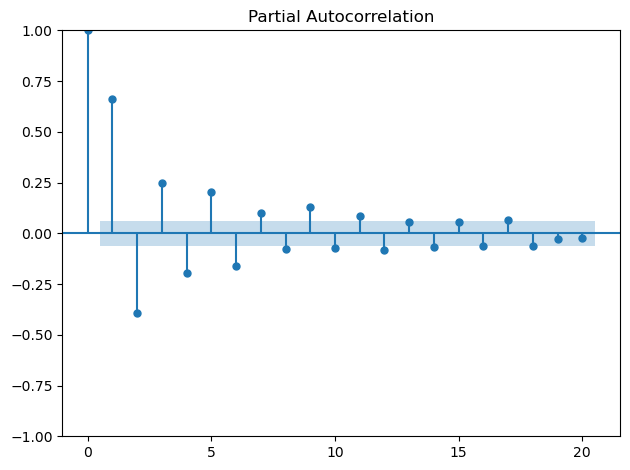

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf
 
plot_pacf(ARMA_1_1, lags=20);
 
plt.tight_layout()


#### In figure 6.5 we can see a clear sinusoidal pattern, meaning that we cannot infer a value for the order p. We know that we simulated an ARMA(1,1) process, but we cannot determine that value from the PACF plot in figure 6.5, since we have significant coefficients past lag 1. Therefore, the PACF plot cannot be used to find the order p of an ARMA(p,q) process.

#### If your process is stationary and both the ACF and PACF plots show a decaying or sinusoidal pattern, then it is a stationary ARMA(p,q) process.